PARTE 1:

In [1]:
#Importamos librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [2]:
#Leemos el primer archivo con los datos meteorológicos
df1 = pd.DataFrame( pd.read_csv("meteo-vid-2018.csv", engine="python" ) )
df1.head()

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,H. suelo 60,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego
0,06/01/2018,17:00:00,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,...,0.23,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0
1,06/01/2018,17:30:00,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,...,0.23,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0
2,06/01/2018,18:00:00,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,...,0.23,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0
3,06/01/2018,18:30:00,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,...,0.23,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0
4,06/01/2018,19:00:00,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,...,0.24,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0


In [3]:
df1.dtypes

Date                 object
Time                 object
batt_volt_Min       float64
logger_temp         float64
short_up_Avg        float64
short_dn_Avg        float64
long_up_Avg         float64
long_dn_Avg         float64
cnr4_T_C_Avg        float64
cnr4_T_K_Avg        float64
long_up_corr_Avg    float64
long_dn_corr_Avg    float64
Rs_net_Avg          float64
Rl_net_Avg          float64
albedo_Avg           object
Rn_Avg              float64
AirTC_Avg           float64
RH                  float64
WS_ms_S_WVT         float64
WindDir_D1_WVT      float64
WindDir_SD1_WVT     float64
Temp_C_Avg(1)       float64
Temp_C_Avg(2)       float64
Temp_C_Avg(3)       float64
Temp_C_Avg(4)        object
H. suelo 60         float64
Result2_Avg         float64
T. suelo 60 cm      float64
Result4_Avg         float64
Result5_Avg         float64
Result6_Avg         float64
Result7_Avg         float64
Result8_Avg         float64
Result9_Avg         float64
Riego               float64
dtype: object

In [4]:
##IMPORTANTE:

#Convertimos la variable albedo_Avg a float64 para la parte 2:
df1['albedo_Avg'] = df1['albedo_Avg'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [5]:
#Creamos la variable FECHAN a partir de DATE y TIME. Desechamos dichas columnas.
df1["FECHAN"] = df1["Date"] +" "+ df1["Time"]
df1.drop( ["Date","Time"], axis=1, inplace=True )

In [6]:
#Convertimos la variable FECHAN a la variable FECHA de tipo datetime
df1['FECHA'] = pd.to_datetime(df1.apply(lambda x: x['FECHAN'], 1), dayfirst=True)
df1 = df1.drop(['FECHAN'], 1)
df1.head()

,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,long_up_corr_Avg,long_dn_corr_Avg,...,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego,FECHA
0,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,416.77,451.00,...,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0,2018-01-06 17:00:00
1,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,401.77,442.70,...,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0,2018-01-06 17:30:00
2,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,395.37,431.87,...,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0,2018-01-06 18:00:00
3,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,386.56,423.54,...,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0,2018-01-06 18:30:00
4,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,382.87,419.49,...,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0,2018-01-06 19:00:00


Ahora vamos a obtener el promedio mensual de los sig. parámetros:

-Latitud (º N)

-Longitud (º O)

-Elevación (m)

-Velocidad del Viento (WS_ms_S_WVT en m/s)

-Tmax (Max de  AirTC_Avg en ºC)

-Tmin (Min de  AirTC_Avg en ºC)

-RHmax (Max de RH en %)

-RHmin (Min de RH en %)

-RHmean (Promedio de RH en %)

-Rs (Radiación neta Rn_Avg en MJ/m2/día)


In [7]:
#Filtramos los datos que vamos a ocupar
df1 = df1.filter(['FECHA','WS_ms_S_WVT','AirTC_Avg','RH','Rn_Avg','albedo_Avg'],axis=1)
df1.head()


,FECHA,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,albedo_Avg
0,2018-01-06 17:00:00,2.33,27.75,20.61,1.79,0.00
1,2018-01-06 17:30:00,3.12,26.57,25.25,-18.59,0.00
2,2018-01-06 18:00:00,2.54,25.01,26.45,-35.10,0.00
3,2018-01-06 18:30:00,2.01,23.65,29.22,-40.13,-0.16
4,2018-01-06 19:00:00,2.14,22.84,31.08,-39.46,-0.15


In [8]:
#Extraemos una variable de mes de la fecha
df1['MES'] = df1['FECHA'].dt.month
df1['DIA'] = df1['FECHA'].dt.day
df1.head()

,FECHA,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,albedo_Avg,MES,DIA
0,2018-01-06 17:00:00,2.33,27.75,20.61,1.79,0.00,1.0,6.0
1,2018-01-06 17:30:00,3.12,26.57,25.25,-18.59,0.00,1.0,6.0
2,2018-01-06 18:00:00,2.54,25.01,26.45,-35.10,0.00,1.0,6.0
3,2018-01-06 18:30:00,2.01,23.65,29.22,-40.13,-0.16,1.0,6.0
4,2018-01-06 19:00:00,2.14,22.84,31.08,-39.46,-0.15,1.0,6.0


In [9]:
#Crearemos dos columnas con la temperatura máxima y mínima por día
df1["AirTC_Avg_max"] =df1.groupby(["MES","DIA"])["AirTC_Avg"].transform("max")
df1["AirTC_Avg_min"] =df1.groupby(["MES","DIA"])["AirTC_Avg"].transform("min")


#Crearemos dos columnas para RHmax y RHmin por día
df1["RH_max"] =df1.groupby(["MES","DIA"])['RH'].transform("max")
df1["RH_min"] =df1.groupby(["MES","DIA"])['RH'].transform("min")

df1.head()

,FECHA,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,albedo_Avg,MES,DIA,AirTC_Avg_max,AirTC_Avg_min,RH_max,RH_min
0,2018-01-06 17:00:00,2.33,27.75,20.61,1.79,0.00,1.0,6.0,27.75,16.03,46.27,20.61
1,2018-01-06 17:30:00,3.12,26.57,25.25,-18.59,0.00,1.0,6.0,27.75,16.03,46.27,20.61
2,2018-01-06 18:00:00,2.54,25.01,26.45,-35.10,0.00,1.0,6.0,27.75,16.03,46.27,20.61
3,2018-01-06 18:30:00,2.01,23.65,29.22,-40.13,-0.16,1.0,6.0,27.75,16.03,46.27,20.61
4,2018-01-06 19:00:00,2.14,22.84,31.08,-39.46,-0.15,1.0,6.0,27.75,16.03,46.27,20.61


In [10]:
#Creamos un nuevo dataframe con los promedios mensuales de cada variable
df_prom_month = pd.DataFrame()

df_prom_month["Vel_viento"] = np.round(  df1.groupby(["MES"])["WS_ms_S_WVT"].transform("mean"), decimals=2)
df_prom_month["Temperatura_mean"] = np.round( df1.groupby(["MES"])["AirTC_Avg"].transform("mean"), decimals=2)
df_prom_month["Temperatura_max"] = np.round( df1.groupby(["MES"])["AirTC_Avg_max"].transform("mean"), decimals=2)
df_prom_month["Temperatura_min"] = np.round( df1.groupby(["MES"])["AirTC_Avg_min"].transform("mean"), decimals=2)
df_prom_month["Humedad_Rel_max"] = np.round( df1.groupby(["MES"])["RH_max"].transform("mean"), decimals=2)
df_prom_month["Humedad_Rel_min"] = np.round( df1.groupby(["MES"])["RH_min"].transform("mean"), decimals=2)
df_prom_month["Humedad_Rel_mean"] = np.round( df1.groupby(["MES"])["RH"].transform("mean"), decimals=2)
df_prom_month["Rad_Solar"] = np.round( df1.groupby(["MES"])["Rn_Avg"].transform("mean"), decimals=2)
df_prom_month["Albedo"] = np.round( df1.groupby(["MES"])['albedo_Avg'].transform("mean"), decimals=2)


df_prom_month=df_prom_month.drop_duplicates(subset=["Vel_viento",'Temperatura_mean','Temperatura_max',"Temperatura_min","Humedad_Rel_max","Humedad_Rel_min",'Humedad_Rel_mean',"Rad_Solar","Albedo"])

df_prom_month.head()

,Vel_viento,Temperatura_mean,Temperatura_max,Temperatura_min,Humedad_Rel_max,Humedad_Rel_min,Humedad_Rel_mean,Rad_Solar,Albedo
0,1.94,16.96,27.34,7.50,66.38,14.06,38.47,34.73,-0.42
1214,1.96,17.23,25.32,9.43,72.54,25.73,48.17,56.25,-0.48
2558,1.93,19.28,29.52,8.88,68.36,15.20,36.97,92.89,-0.41
4046,2.10,21.88,32.67,10.78,76.59,15.71,40.79,134.01,-0.39
5486,2.11,23.65,34.13,12.78,79.97,17.23,44.23,162.41,-0.37


In [11]:
#Quitamos la última fila
df_prom_month = df_prom_month.drop(df1.index[17247]).reset_index(drop=True)
df_prom_month.head()

,Vel_viento,Temperatura_mean,Temperatura_max,Temperatura_min,Humedad_Rel_max,Humedad_Rel_min,Humedad_Rel_mean,Rad_Solar,Albedo
0,1.94,16.96,27.34,7.50,66.38,14.06,38.47,34.73,-0.42
1,1.96,17.23,25.32,9.43,72.54,25.73,48.17,56.25,-0.48
2,1.93,19.28,29.52,8.88,68.36,15.20,36.97,92.89,-0.41
3,2.10,21.88,32.67,10.78,76.59,15.71,40.79,134.01,-0.39
4,2.11,23.65,34.13,12.78,79.97,17.23,44.23,162.41,-0.37


In [43]:
#Reiniciamos el índice y agregamos los meses
mes=["Enero",'Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
df_prom_month['MES']=mes
df_prom_month.set_index('MES')

,Vel_viento,Temperatura_mean,Temperatura_max,Temperatura_min,Humedad_Rel_max,Humedad_Rel_min,Humedad_Rel_mean,Rad_Solar,Albedo,MESES
MES,,,,,,,,,,
Enero,1.94,16.96,27.34,7.50,66.38,14.06,38.47,34.73,-0.42,Enero
Febrero,1.96,17.23,25.32,9.43,72.54,25.73,48.17,56.25,-0.48,Febrero
Marzo,1.93,19.28,29.52,8.88,68.36,15.20,36.97,92.89,-0.41,Marzo
Abril,2.10,21.88,32.67,10.78,76.59,15.71,40.79,134.01,-0.39,Abril
Mayo,2.11,23.65,34.13,12.78,79.97,17.23,44.23,162.41,-0.37,Mayo
Junio,2.15,28.42,36.97,19.55,81.38,25.80,50.81,163.93,-0.38,Junio
Julio,2.02,31.07,38.42,24.49,85.18,32.81,57.64,157.53,-0.19,Julio
Agosto,1.91,30.12,36.99,24.70,92.54,42.21,68.87,151.27,-0.38,Agosto
Septiembre,1.79,29.66,37.58,23.58,93.10,36.61,66.62,136.75,-0.49,Septiembre


In [45]:
df_prom_month.dtypes

Vel_viento          float64
Temperatura_mean    float64
Temperatura_max     float64
Temperatura_min     float64
Humedad_Rel_max     float64
Humedad_Rel_min     float64
Humedad_Rel_mean    float64
Rad_Solar           float64
Albedo              float64
MESES                object
MES                  object
dtype: object

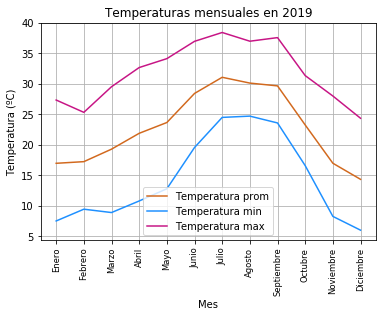

In [68]:
#Gráfica de Temperaturas para 2018
X = mes                 
N = np.arange(12)         
Y1 = df_prom_month['Temperatura_mean']     
Y2 = df_prom_month['Temperatura_min']     
Y3 = df_prom_month['Temperatura_max']     


plt.plot(Y1, label = 'Temperatura prom', color = '#D2691E')   
plt.plot(Y2, label = 'Temperatura min', color = '#1E90FF')   
plt.plot(Y3, label = 'Temperatura max', color = '#C71585')   

plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.xlabel("Mes")   
plt.ylabel("Temperatura (ºC)")  
plt.legend()
plt.grid()
plt.title('Temperaturas mensuales en 2019')
plt.savefig('T_2019',plt=2000)
plt.show()

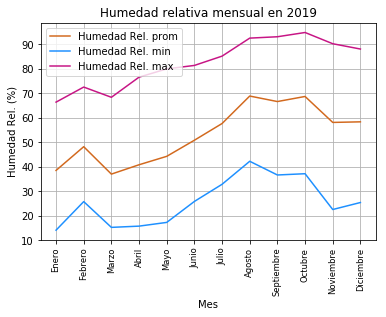

In [67]:
#Gráfica de humedad relativa para 2018
X = mes                 
N = np.arange(12)         
Y1 = df_prom_month['Humedad_Rel_mean']     
Y2 = df_prom_month['Humedad_Rel_min']     
Y3 = df_prom_month['Humedad_Rel_max']     


plt.plot(Y1, label = 'Humedad Rel. prom', color = '#D2691E')   
plt.plot(Y2, label = 'Humedad Rel. min', color = '#1E90FF')   
plt.plot(Y3, label = 'Humedad Rel. max', color = '#C71585')   

plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.xlabel("Mes")   
plt.ylabel("Humedad Rel. (%)")  
plt.legend()
plt.grid()
plt.title('Humedad relativa mensual en 2019')
plt.savefig('HR_2019',plt=2000)
plt.show()

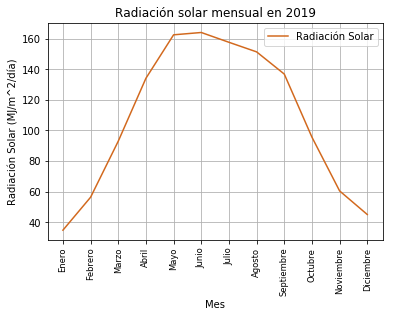

In [69]:
#Gráfica de radiación solar para 2018
X = mes                 
N = np.arange(12)         
Y1 = df_prom_month['Rad_Solar']     

plt.plot(Y1, label = 'Radiación Solar', color = '#D2691E')  
plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.xlabel("Mes")   
plt.ylabel("Radiación Solar (MJ/m^2/día)")  
plt.legend()
plt.grid()
plt.title('Radiación solar mensual en 2019')
plt.savefig('Rs_2019',plt=2000)
plt.show()

PARTE 2:

Con esa tabla de valores procederemos a estimar la Evapotranspiración ET0 mensual promedio, utilizando las ecuaciones de los siguientes 3 autores que aparecen en el artículo de K. Djaman: 

   * Ec 7, Jansen & Haise (1963):
   
       ET0 = (0.0252Tmean + 0.078)Rs
 
 
 
   * Ec. 31, Valiantzas 1 (2012):  
   
      ET0 = 0.0393 Rs (Tmean + 9.5)^0.5 - 0.19(Rs^0.6)(φ^0.15) + 0.0061(Tmean + 20)(1.11Tmean - Tmin - 2)^0.7
   
    - 𝜑 es la latitud en radianes.
   
   
   * Ec. 32,  Valiantzas 4 (2013):
   
      ET0 = 0.051(1 - α)Rs(Tmean + 9.5)^0.5 - 2.4(Rs/Ra)^2 + 0.048(Tmean + 20)(1 - RH/100)(0.5 + 0.536u2) + 0.00012z
   
    - α es el albedo (Albedo_Avg).
    - u2 es la velocidad del viento a 2 m de altura (WS_ms_S_WVT). 
    - z es la altura sobre el nivel mar. 
    - Ra es la radiación solar en la parte alta de la atmósfera: 
    
      Ra = 24(60)/π (Gsc)(dr)(ωsinφsinδ + cosφcosδsinω)
           Gsc es la constante solar (Gsc=0.0820 MJm^-2min^-1)
           dr = distancia relativa entre la Tierra y el Sol
           ω = ángulo de la hora donde se oculta el sol
           φ = latitud (rad)
           δ = declinación solar (rad)
   
   
    

In [13]:
#Ecuación 7:
ET0_7 = []
for i in range (0,len(df_prom_month)):
    ET0_7.append((0.0252*df_prom_month['Temperatura_mean'][i] + 0.078)*df_prom_month['Rad_Solar'][i])

In [14]:
#Ecuación 31:
φ = (math.pi/180)*28.94917
ET0_31 = []
for i in range (0,len(df_prom_month)):
    ET0_31.append(0.0393*df_prom_month['Rad_Solar'][i]*(df_prom_month['Temperatura_mean'][i] + 9.5)**0.5 - 0.19*(df_prom_month['Rad_Solar'][i]**0.6)*(φ**0.15) + 0.0061*(df_prom_month['Temperatura_mean'][i] + 20)*(1.12*df_prom_month['Temperatura_mean'][i] - df_prom_month['Temperatura_min'][i] - 2)**0.7)


In [15]:
#Ecuación 34: 

#Para esto, debemos obtener primero Ra. Calcularemos los parámetros de Ra:
dr = []
δ = []
ω = []

for m in range (0,len(df_prom_month)):
    α = df_prom_month['Albedo'][i]
    j = int(30.4*m - 15)
    dr.append(1 + 0.033*math.cos(((2*math.pi)/365)*j))
    δ.append(0.409*math.sin(((2*math.pi)/365)*j - 1.39))
    ω.append(math.acos(-math.tan(φ)*math.tan(0.409*math.sin(((2*math.pi)/365)*j - 1.39))))

In [16]:
#Guardamos los arreglos en un dataframe auxiliar
df_aux = pd.DataFrame()
df_aux['dr'] = dr
df_aux['δ'] = δ
df_aux['ω'] = ω
df_aux = df_aux.apply(pd.to_numeric, errors='coerce')

φ = (math.pi/180)*28.94917

df_aux.head()


,dr,δ,ω
0,1.031906,-0.407775,1.329507
1,1.031906,-0.370216,1.354428
2,1.023584,-0.236097,1.437322
3,1.008564,-0.033386,1.552321
4,0.991711,0.172248,1.667178


In [17]:
#Calculamos Ra por mes:
Ra = []
for i in range (0,len(df_prom_month)):
    Ra.append(((24*60)/math.pi)*0.0820*(df_aux['ω'][i]*math.sin(φ)*math.sin(df_aux['δ'][i]) + math.cos(φ)*math.cos(df_aux['δ'][i])*math.sin(df_aux['ω'][i])))

In [18]:
#Convertimos el arreglo de Ra en float64:
df_aux['Ra'] = Ra
df_aux['Ra'] = df_aux['Ra'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [19]:
#Calculamos la ecuación 34:
ET0_34 = [] 
for i in range (0,len(df_prom_month)):
    ET0_34.append(0.051*(1 - df_prom_month['Albedo'][i])*df_prom_month['Rad_Solar'][i]*(df_prom_month['Temperatura_mean'][i] + 9.5)**0.5 - 2.4*(df_prom_month['Rad_Solar'][i]/df_aux['Ra'][i])**2 + 0.048*(df_prom_month['Temperatura_mean'][i] + 20)*(1 - df_prom_month['Humedad_Rel_mean'][i]/100)*(0.5 + 0.536*df_prom_month['Vel_viento'][i]) + 0.00012*101)

In [20]:
#Creamos un dataframe con los ET0 calculados:
ET0 = {'ET0_7': ET0_7, 'ET0_31': ET0_31, 'ET0_34':ET0_34,'MES':mes}
ET0 = pd.DataFrame(data=ET0)
ET0.set_index('MES')


,ET0_7,ET0_31,ET0_34
MES,,,
Enero,17.552264,6.669480,7.191386
Febrero,28.811025,10.466810,6.230459
Marzo,52.376584,18.243966,6.013087
Abril,84.342678,27.693491,12.869848
Mayo,109.461092,34.603153,22.118557
Junio,130.190583,37.524763,34.717773
Julio,135.627659,37.233995,29.401364
Agosto,126.616620,35.133306,36.641583
Septiembre,112.877826,31.608780,36.512239


PARTE 3:

In [21]:
#Leemos el primer archivo con los datos meteorológicos
df2 = pd.DataFrame( pd.read_csv("flujos-vid-2018.csv", engine="python" ) )
df2.head()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,--,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,...,-,days,W_m-2,umolm-2s-1,degC,degK,umolm-2s-1,umolm-2s-1,umolm-2s-1,-
1,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0,-9999,16.51,207.66,0.92767,1.00713,-1.0729,1
2,2018,7,1,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0,-9999,16.61,207.66,0.92767,1.01249,-9.62E-01,1
3,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0,-9999,16.07,207.66,0.92767,0.98371,-1.1643,1
4,2018,7,2,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0,-9999,16.06,207.66,0.92767,0.98318,-1.1648,1


In [22]:
df2 = df2.filter(['Year','DoY','Hour','Rg_f','LE_f','H_f'],axis=1)
df2.head()

,Year,DoY,Hour,Rg_f,LE_f,H_f
0,--,--,--,Wm-2,Wm-2,Wm-2
1,2018,7,0.5,-0.87,11.52,-20.04
2,2018,7,1,-0.97,15.11,-7.34
3,2018,7,1.5,-0.96,8.61,-9.76
4,2018,7,2,-2.06,1.93,-8.55


In [23]:
#Quitamos la primera fila con las unidades
df2 = df2.drop(df2.index[0]).reset_index(drop=True)
df2.head()

,Year,DoY,Hour,Rg_f,LE_f,H_f
0,2018,7,0.5,-0.87,11.52,-20.04
1,2018,7,1,-0.97,15.11,-7.34
2,2018,7,1.5,-0.96,8.61,-9.76
3,2018,7,2,-2.06,1.93,-8.55
4,2018,7,2.5,-1.32,6.40,-0.55


In [24]:
#Para hacer una variable de fecha, tenemos que crear un arreglo de horas
#Para esto convertimos la columna correspondientes a tipo string.
df2['Hour'] = df2['Hour'].astype(str)
df2.dtypes

Year    object
DoY     object
Hour    object
Rg_f    object
LE_f    object
H_f     object
dtype: object

In [25]:
#Llenamos el arreglo de horas y minutos

hora=[]
minuto=[]

for i in range (0, len(df2)):

    #Primero revisaremos si contiene 1 caracter:
    if (len(str(df2['Hour'][i]))==1):
            hora.append(str(df2['Hour'][i])[0:1])
            minuto.append('00')
        
    #Si resulta ser de 2 caracteres:
    if(len(str(df2['Hour'][i]))==2):
        if (str(df2['Hour'][i])[0:2]=='24'):
            hora.append('00')
            minuto.append('00')
        else:        
            hora.append(str(df2['Hour'][i])[0:2])
            minuto.append('00')
    
    #Si resulta ser de 3 caracteres:
    elif(len(str(df2['Hour'][i]))==3):
            hora.append(str(df2['Hour'][i])[0:1])
            minuto.append('30')

    #Si resulta ser de 3 caracteres:
    elif(len(str(df2['Hour'][i]))==4):
            hora.append(str(df2['Hour'][i])[0:2])
            minuto.append('30')
        
#Arreglo para los días
dias =[df2['DoY'][i] for i in range(0,len(df2))]

In [26]:
#Creamos un data frame con las horas, minutos y días del df2
d = {'dias': dias, 'hora': hora, 'minuto':minuto}
df_fechas = pd.DataFrame(data=d)
df_fechas.head()

,dias,hora,minuto
0,7,0,30
1,7,1,00
2,7,1,30
3,7,2,00
4,7,2,30


In [27]:
#Convertimos la primera columna a tipo float64
df_fechas['dias'] = df_fechas['dias'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
df_fechas.dtypes

dias       int64
hora      object
minuto    object
dtype: object

In [28]:
#En la nueva columna "dia", aumentamos un día a "dias" cuando marque la hora 00:00
dia=[]
for i in range(0,len(df_fechas)):
    if (df_fechas['hora'][i]=='00' and df_fechas['minuto'][i]=='00'):
        dia.append(df_fechas['dias'][i] +1)
    else:
        dia.append(df_fechas['dias'][i])
df_fechas['dia']=dia
df_fechas.head()

,dias,hora,minuto,dia
0,7,0,30,7
1,7,1,00,7
2,7,1,30,7
3,7,2,00,7
4,7,2,30,7


In [29]:
#Creamos una variable de tipo string con el año, el número de día, la hora y el minuto
fechas = []
for i in range (0,len(df2)):
    fechas.append('2018 '+str(df_fechas['dia'][i])+ ' ' + df_fechas['hora'][i]+' '+df_fechas['minuto'][i])

In [30]:
#Convertimos los elementos del arreglo fechas a variables tipo datetime
FECHA = []
for i in range(0,len(df2)):
    d=datetime.datetime.strptime(fechas[i],'%Y %j %H %M')
    F = d.isoformat(' ')
    FECHA.append(F)

In [31]:
#Antes de agregar la columna de FECHA al dataframe, convertimos los valores de este a tipo float64
df2 = df2.apply(pd.to_numeric, errors='coerce')
df2.dtypes

Year      int64
DoY       int64
Hour    float64
Rg_f    float64
LE_f    float64
H_f     float64
dtype: object

In [32]:
#Agregamos la columna FECHA al dataframe
df2['FECHAN']=FECHA
df2.tail()

,Year,DoY,Hour,Rg_f,LE_f,H_f,FECHAN
17227,2018,365,22.0,-1.93,2.79,-0.75,2018-12-31 22:00:00
17228,2018,365,22.5,-2.00,0.63,-3.72,2018-12-31 22:30:00
17229,2018,365,23.0,-2.11,1.06,-3.49,2018-12-31 23:00:00
17230,2018,365,23.5,-1.92,-0.46,-9.24,2018-12-31 23:30:00
17231,2018,365,24.0,-2.64,-2.29,27.24,2019-01-01 00:00:00


In [33]:
#Convertimos la columna FECHAN a tipo datetime
df2['FECHA'] = pd.to_datetime(df2.apply(lambda x: x['FECHAN'], 1), dayfirst=True)
df2 = df2.drop(['FECHAN','Year','DoY','Hour'], 1)
df2.dtypes

Rg_f            float64
LE_f            float64
H_f             float64
FECHA    datetime64[ns]
dtype: object

In [34]:
df2['MES'] = df2['FECHA'].dt.month
df2['DIA'] = df2['FECHA'].dt.day
df2['HORA'] = df2['FECHA'].dt.hour

df2.dtypes

Rg_f            float64
LE_f            float64
H_f             float64
FECHA    datetime64[ns]
MES               int64
DIA               int64
HORA              int64
dtype: object

In [35]:
df2["Rg_f_mean"] =df2.groupby(["MES","DIA","HORA"])["Rg_f"].transform("mean")
df2["LE_f_mean"] =df2.groupby(["MES","DIA","HORA"])["LE_f"].transform("mean")
df2["H_f_mean"] =df2.groupby(["MES","DIA","HORA"])["H_f"].transform("mean")

df2=df2.drop_duplicates(subset=["Rg_f_mean",'LE_f_mean','H_f_mean'])
df2.head()

,Rg_f,LE_f,H_f,FECHA,MES,DIA,HORA,Rg_f_mean,LE_f_mean,H_f_mean
0,-0.87,11.52,-20.04,2018-01-07 00:30:00,1,7,0,-0.870,11.520,-20.040
1,-0.97,15.11,-7.34,2018-01-07 01:00:00,1,7,1,-0.965,11.860,-8.550
3,-2.06,1.93,-8.55,2018-01-07 02:00:00,1,7,2,-1.690,4.165,-4.550
5,-1.22,2.44,-2.92,2018-01-07 03:00:00,1,7,3,-1.180,2.420,-2.765
7,-1.74,2.49,-1.29,2018-01-07 04:00:00,1,7,4,-1.490,4.145,-4.680


In [36]:
#Reducimos el dataframe al mes de febrero
df3=df2[df2['MES']==2]
df3=df3.reset_index(drop=True)
df3.tail()

,Rg_f,LE_f,H_f,FECHA,MES,DIA,HORA,Rg_f_mean,LE_f_mean,H_f_mean
667,-2.84,-0.27,0.84,2018-02-28 19:00:00,2,28,19,-2.405,-1.180,-5.110
668,-3.27,2.58,-34.56,2018-02-28 20:00:00,2,28,20,-3.620,1.840,-33.395
669,-4.15,2.46,-26.03,2018-02-28 21:00:00,2,28,21,-4.215,1.775,-26.950
670,-3.90,6.32,-20.26,2018-02-28 22:00:00,2,28,22,-3.885,5.175,-19.175
671,-3.60,-0.36,-11.98,2018-02-28 23:00:00,2,28,23,-3.235,0.000,-10.845


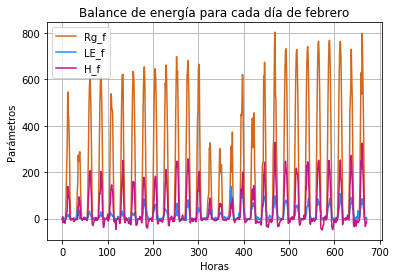

In [37]:
#Gráfica de balance de energía para cada día del mes de febrero
Y1 = df3['Rg_f_mean']          
Y2 = df3['LE_f_mean']          
Y3 = df3['H_f_mean']        

plt.plot(Y1, label = "Rg_f", color = '#D2691E')   
plt.plot(Y2, label = "LE_f", color = '#1E90FF')   
plt.plot(Y3, label = "H_f", color = '#C71585')   
plt.xlabel("Horas")   
plt.ylabel("Parámetros")  
plt.legend()
plt.grid()
plt.title('Balance de energía para cada día de febrero')
plt.savefig('balance_feb',plt=2000)
plt.show()



In [38]:
#Reducimos el dataframe al 1ero de febrero
df4=df3[df3['DIA']==1]
df4=df4.reset_index(drop=True)
df4.head()

,Rg_f,LE_f,H_f,FECHA,MES,DIA,HORA,Rg_f_mean,LE_f_mean,H_f_mean
0,-3.53,3.37,-0.88,2018-02-01 00:00:00,2,1,0,-2.955,1.895,-2.275
1,-3.53,2.72,22.67,2018-02-01 01:00:00,2,1,1,-2.725,1.630,8.720
2,-1.61,1.27,-12.13,2018-02-01 02:00:00,2,1,2,-2.060,1.340,-17.470
3,-3.71,0.44,-5.43,2018-02-01 03:00:00,2,1,3,-3.025,0.975,-6.600
4,-1.37,-4.90,-8.51,2018-02-01 04:00:00,2,1,4,-1.760,-2.405,-10.330


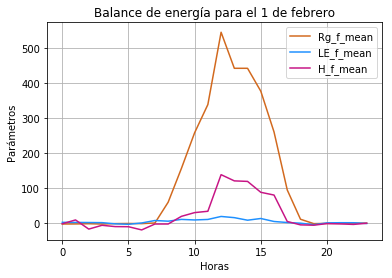

In [39]:
HORAS=[i for i in range(0,24)]

#Gráfica de balance de energía para el 1ero de febrero
X = HORAS                 
N = np.arange(24)         
Y1 = df4['Rg_f_mean']     
Y2 = df4['LE_f_mean']     
Y3 = df4['H_f_mean']      


plt.plot(Y1, label = 'Rg_f_mean', color = '#D2691E')   
plt.plot(Y2, label = 'LE_f_mean', color = '#1E90FF')   
plt.plot(Y3, label = 'H_f_mean', color = '#C71585')   
plt.xlabel("Horas")   
plt.ylabel("Parámetros")  
plt.legend()
plt.grid()
plt.title('Balance de energía para el 1 de febrero')
plt.savefig('balance_feb1',plt=2000)
plt.show()

In [40]:
#Promedio por hora en febrero
df5=pd.DataFrame()
df5['HORA']=df3['HORA']
df5['FECHA']=df3['FECHA']
df5["Rg_f_mean"] =df3.groupby(["HORA"])["Rg_f_mean"].transform("mean")
df5["LE_f_mean"] =df3.groupby(["HORA"])["LE_f_mean"].transform("mean")
df5["H_f_mean"] =df3.groupby(["HORA"])["H_f_mean"].transform("mean")
df5=df5.drop_duplicates(subset=["Rg_f_mean",'LE_f_mean','H_f_mean'])

df5.head()


,HORA,FECHA,Rg_f_mean,LE_f_mean,H_f_mean
0,0,2018-02-01 00:00:00,-1.990179,0.677679,-5.661964
1,1,2018-02-01 01:00:00,-1.904107,1.733214,-3.928571
2,2,2018-02-01 02:00:00,-1.951607,0.513929,-3.977143
3,3,2018-02-01 03:00:00,-1.728571,1.542321,-3.857679
4,4,2018-02-01 04:00:00,-1.736429,1.647321,-3.604643


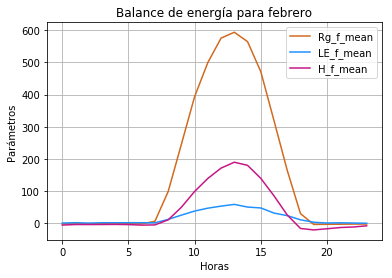

In [70]:
#Gráfica de balance de energía para febrero (promedio de cada una de las horas)
X = HORAS   
N = np.arange(24)           
Y1 = df5['Rg_f_mean']       
Y2 = df5['LE_f_mean']       
Y3 = df5['H_f_mean']        

plt.plot(X, Y1, label="Rg_f_mean", color = '#D2691E') 
plt.plot(Y2, label="LE_f_mean", color = '#1E90FF') 
plt.plot(Y3, label="H_f_mean", color = '#C71585')
plt.xlabel("Horas")                              
plt.ylabel("Parámetros")                         
plt.legend()                                     
plt.grid()
plt.title('Balance de energía para febrero') 
plt.savefig('balance_febrero_mensual',plt=2000)     
plt.show()                 